# Distribution of distances from MD simulation using GFN-FF in xTB

Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, re

Read in the trajectory file `xtb.xyz` and input file, `md_input.inp`, find the total time (in ps) and the dump rate (in fs).

In [2]:
xtb = pd.read_csv('xtb.xyz')

In [3]:
with open('md_input.inp', 'r', encoding='utf-8') as md:
    lines = md.readlines()
    for line in lines:
        if 'time' in line:
            total_time = int(re.findall(pattern='\d+', string=line)[0])
        elif 'dump' in line:
            dump = float(re.findall(pattern='\d+\.\d+', string=line)[0])
            

Enter the locations of radicals in Avogadro (numbers of atoms).

In [4]:
o1 = 236
o2 = 273

Extract the coordinates and put them in the dataframe.

In [5]:
#reading number of atoms

for col in xtb.columns:
    n_rows = int(col)+2
    
#Creating dataframes of separate atoms

df_o1 = xtb[xtb.index % n_rows == o1]
df_o2 = xtb[xtb.index % n_rows == o2]


#Formatting strings, splitting into columns, delete the element column, setting type to float

df_o1 = df_o1['{}'.format(n_rows-2)].str.replace(' +', ' ', regex=True).str.split(' ', expand=True)
df_o1 = df_o1.drop(columns=0).astype('float64').rename({1:'x1', 2:'y1', 3:'z1'}, axis=1).reset_index(drop=True)


df_o2 = df_o2['{}'.format(n_rows-2)].str.replace(' +', ' ', regex=True).str.split(' ', expand=True)
df_o2 = df_o2.drop(columns=0).astype('float64').rename({1:'x2', 2:'y2', 3:'z2'}, axis=1).reset_index(drop=True)

#Combining into single dataframe
coords = pd.concat([df_o1, df_o2], axis=1)




Calculate distance and add time.

In [6]:
coords['distance'] = np.sqrt((coords['x2'] - coords['x1'])**2 + (coords['y2'] - coords['y1'])**2 + (coords['z2'] - coords['z1'])**2)/10
coords['time'] = np.arange(10, total_time*1000+10, dump)

Visualization, distance with time

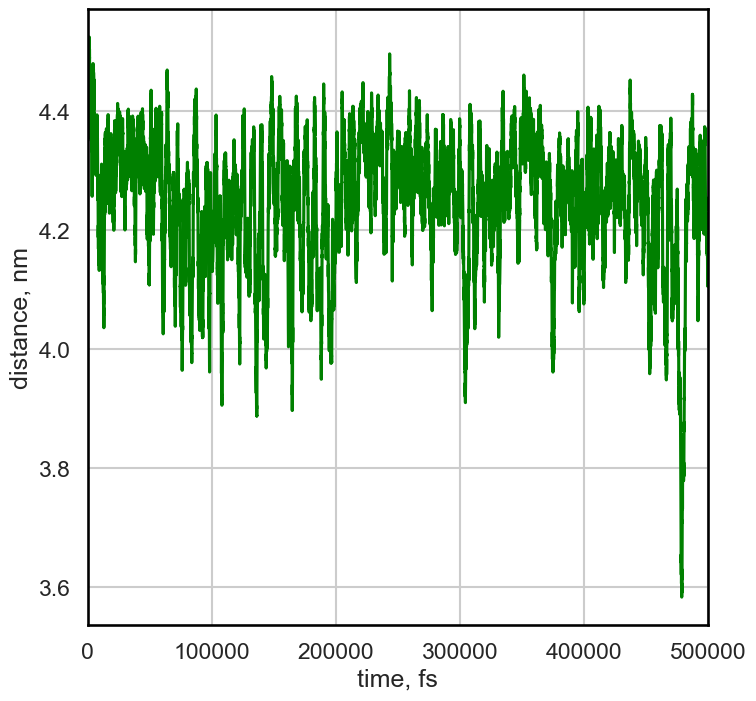

In [11]:
sns.set_context("talk")
sns.set_style("whitegrid", {"axes.edgecolor": "black"})
sns.lineplot(data=coords, x="time", y="distance", color='g')
plt.xlim(0, total_time*1000)
plt.ylim()

plt.xlabel('time, fs')
plt.ylabel('distance, nm')



plt.gcf().set_size_inches(8, 8)

    
# plt.savefig('dist_time.png', dpi=600)


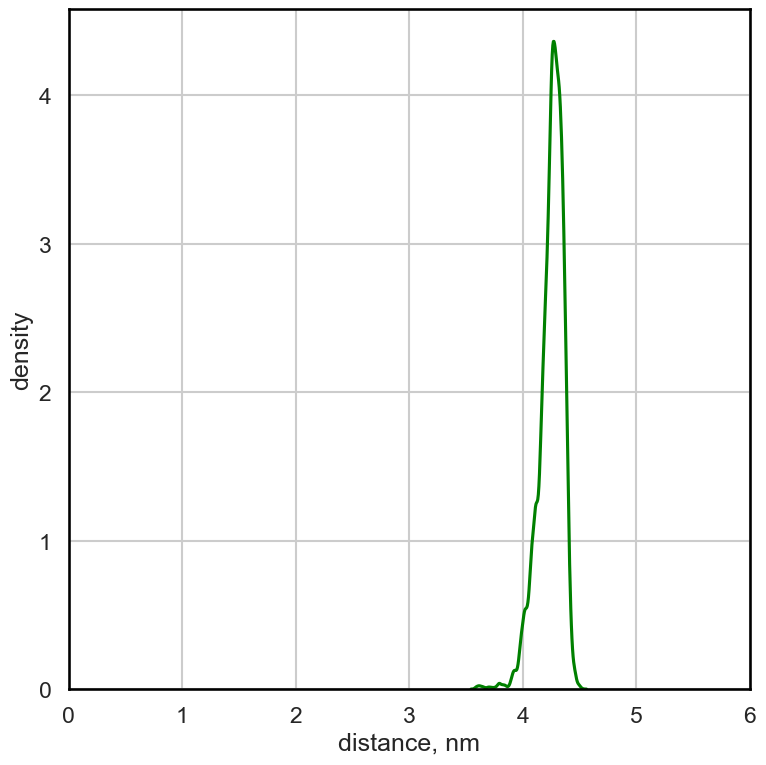

In [18]:
sns.kdeplot(data=coords, x="distance", color='g', common_norm=True)

plt.xlabel('distance, nm')
plt.ylabel('density')

plt.xlim([0,6])

plt.gcf().set_size_inches(8, 8)
plt.tight_layout()
plt.show()